# DATASET INFORMATION

Dataset yang digunakan dalam masalah Atrrition berumber dari kaggle.com yang didapat melalui link berikut : ``https://www.kaggle.com/colearninglounge/employee-attrition``

Adapun __Informasi Features__ di dalam dapat dijelaskan sebagai berikut ini :
- __AGE :__ Numerical Value
- __ATTRITION :__ Employee leaving the company (0=no, 1=yes)
- __BUSINESS TRAVEL :__ (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
- __DAILY RATE :__ Numerical Value - Salary Level
- __DEPARTMENT :__ (1=HR, 2=R&D, 3=Sales)
- __DISTANCE FROM HOME :__ Numerical Value - THE DISTANCE FROM WORK TO HOME
- __EDUCATION :__ Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
- __EDUCATION FIELD :__ (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
- __EMPLOYEE COUNT :__ Numerical Value
- __EMPLOYEE NUMBER :__ Numerical Value - EMPLOYEE ID
- __ENVIRONMENT SATISFACTION :__ Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
- __GENDER :__ (1=FEMALE, 2=MALE)
- __HOURLY RATE :__ Numerical Value - HOURLY SALARY
- __JOB INVOLVEMENT :__ Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
- __JOB LEVEL :__ Numerical Value - LEVEL OF JOB
- __JOB ROLE :__ (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)
- __JOB SATISFACTION :__ Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
- __MARITAL STATUS :__ (1=DIVORCED, 2=MARRIED, 3=SINGLE)
- __MONTHLY INCOME :__ Numerical Value - MONTHLY SALARY
- __MONTHLY RATE :__ Numerical Value - MONTHLY RATE
- __NUMCOMPANIES WORKED :__ Numerical Value - NO. OF COMPANIES WORKED AT
- __OVER 18 :__ (1=YES, 2=NO)
- __OVERTIME :__ (1=NO, 2=YES)
- __PERCENT SALARY HIKE :__ Numerical Value - PERCENTAGE INCREASE IN SALARY
- __PERFORMANCE RATING :__ Numerical Value - PERFORMANCE RATING
- __RELATIONS SATISFACTION :__ Numerical Value - RELATIONS SATISFACTION
- __STANDARD HOURS :__ Numerical Value - STANDARD HOURS
- __STOCK OPTIONS LEVEL :__ Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)
- __TOTAL WORKING YEARS :__ Numerical Value - TOTAL YEARS WORKED
- __TRAINING TIMES LAST YEAR :__ Numerical Value - HOURS SPENT TRAINING
- __WORK LIFE BALANCE :__ Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE
- __YEARS AT COMPANY :__ Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY
- __YEARS IN CURRENT ROLE :__ Numerical Value -YEARS IN CURRENT ROLE
- __YEARS SINCE LAST PROMOTION :__ Numerical Value - LAST PROMOTION
- __YEARS WITH CURRENT MANAGER :__ Numerical Value - YEARS SPENT WITH CURRENT MANAGER

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pingouin as pg
from scipy import stats

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth', 100)

In [3]:
df = pd.read_csv('Data/employee_attrition_train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [5]:
df.shape

(1029, 35)

In [6]:
def summary(df):
    dtype = []
    nan = []
    nan_perc = []
    nunique = []
    unique = []
    
    for i in df.columns:
        dtype.append(df[i].dtype)
        nan.append(df[i].isna().sum())
        nan_perc.append((df[i].isna().sum()/len(df[i]))*100)
        nunique.append(df[i].nunique())
        val_counts = df[i].value_counts(normalize=True)
        unique.append(list(val_counts.index))
    
    summary_df = pd.DataFrame({'dtype': dtype, 'nan' : nan, 'nan_perc' : nan_perc, 'nunique' : nunique, 'unique': unique}, index=df.columns)
    
    return display(summary_df)

In [7]:
summary(df)

,dtype,nan,nan_perc,nunique,unique
Age,float64,136,13.216715,39,"[29.0, 36.0, 34.0, 31.0, 32.0, 33.0, 30.0, 40.0, 38.0, 27.0, 42.0, 41.0, 37.0, 45.0, 39.0, 43.0,..."
Attrition,object,0,0.000000,2,"[No, Yes]"
BusinessTravel,object,5,0.485909,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,float64,27,2.623907,692,"[1329.0, 1082.0, 329.0, 530.0, 691.0, 117.0, 267.0, 867.0, 1005.0, 1395.0, 583.0, 635.0, 829.0, ..."
Department,object,0,0.000000,3,"[Research & Development, Sales, Human Resources]"
DistanceFromHome,float64,95,9.232264,27,"[1.0, 2.0, 9.0, 10.0, 8.0, 7.0, 4.0, 6.0, 26.0, 16.0, 18.0, 11.0, 25.0, 24.0, 29.0, 12.0, 23.0, ..."
Education,int64,0,0.000000,5,"[3, 4, 2, 1, 5]"
EducationField,object,0,0.000000,6,"[Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources]"
EmployeeCount,int64,0,0.000000,1,[1]
EmployeeNumber,int64,0,0.000000,1029,"[2045, 741, 664, 663, 662, 661, 659, 657, 653, 652, 648, 644, 643, 641, 639, 638, 635, 632, 631,..."


# Duplicated Data

In [8]:
df[df['EmployeeNumber'].duplicated(keep=False) == True]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [9]:
len(df[df['EmployeeNumber'].duplicated(keep=False) == True])

0

__Note :__ Pengecekan duplikasi data dilakukan agar tida ada data karyawan dengan orang yang sama, namun ter-input datanya berkali-kali. Pada dataset pengecekan dapat dilihat pada feature __Employee Number__. Berdasarkan hasil pengecekan ini tidak ditemukan adanya data karyawan yang berulang.

# Removing Unnecessary Feature 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


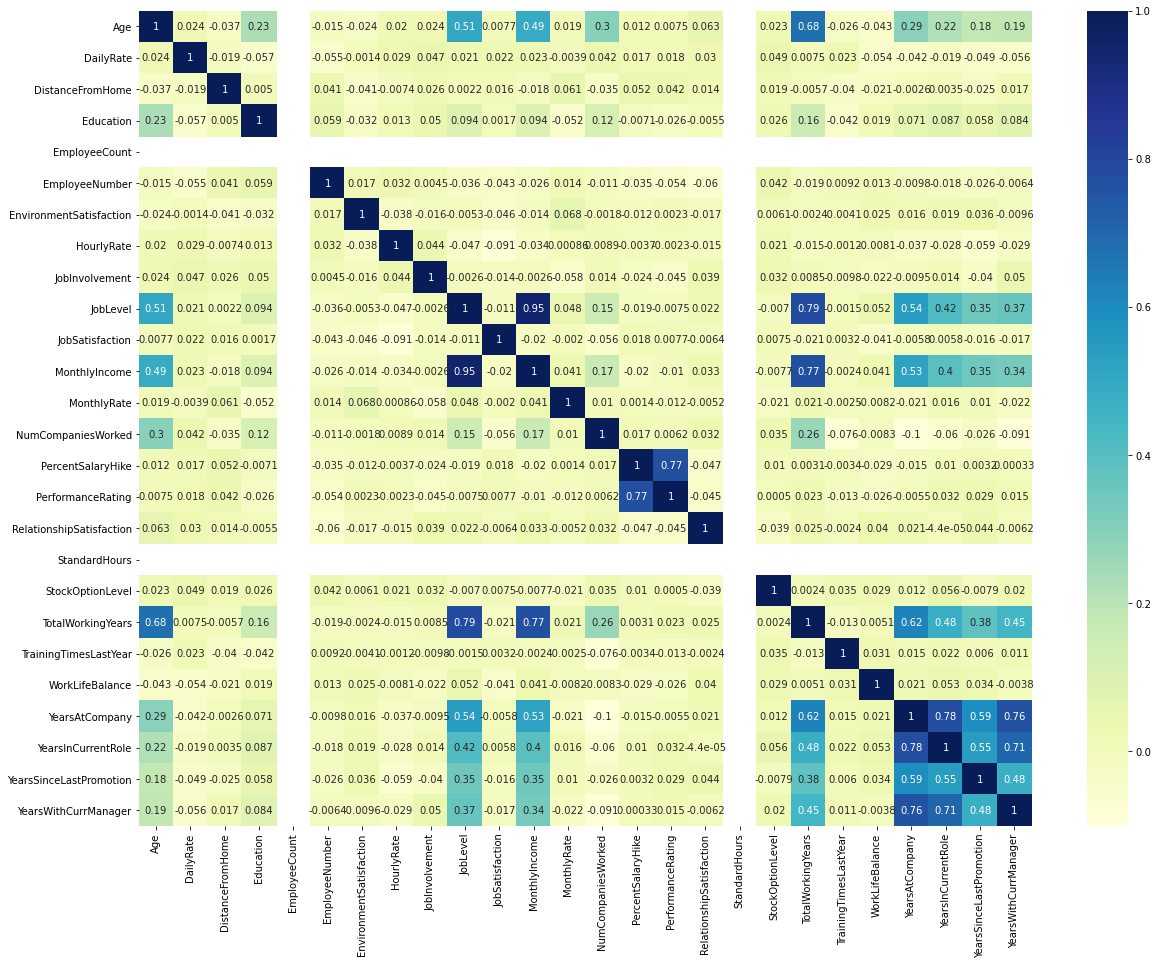

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [12]:
unuseful = ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'Over18', 
            'EmployeeCount', 'StandardHours']

In [13]:
df = df.drop(unuseful, axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,Research & Development,1.0,2,Medical,4,Male,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,Research & Development,6.0,2,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,Sales,7.0,1,Marketing,2,Male,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,Human Resources,NaN,3,Medical,1,Male,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,Research & Development,7.0,4,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


__Note :__ Berdasarkan informasi dataset dan hasil statistika deskripsi terdapat beberapa feature yang dihiangkan. Feature-feature tersebut merupakan feature yang kemungkinan tidak memberikan informasi yang kuat untuk memprediksi _employee attrition_. Adapun feature-feature tersbut adalah :
- __EmployeeNumber :__ Dihapus karena hanya memberikan identidas setiap data.
- __Over18 :__ Dihapus karena feature ini 
- __HourlyRate & DailyRate :__ Dihapus karena feature ini sudah diwakilkan oleh MonthlyRate.
- __EmployeeCount & StandardHours :__ Dihapus karena feature ini hanya memiliki 1 unique value sehingga std deviasi = 0. Sehingga pastinya tidak akan memiliki korelasi dengan feature manapun.

# Handling Missing Value

In [14]:
df.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

<AxesSubplot:>

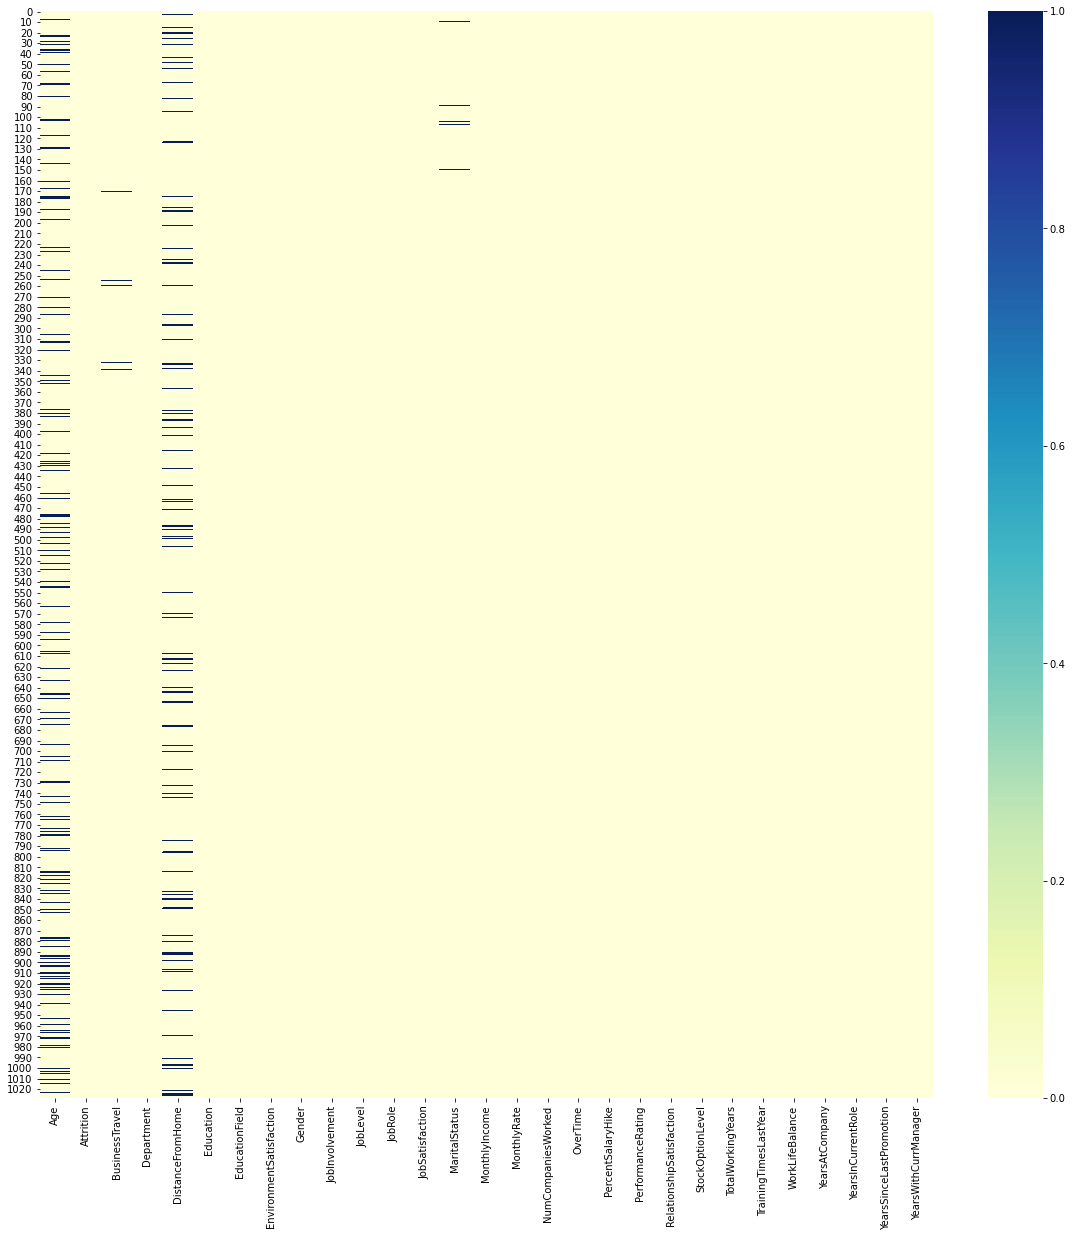

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.isna(), cmap='YlGnBu')

In [19]:
df[df.isna().any(axis=1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,50.0,No,Travel_Frequently,Human Resources,NaN,3,Medical,1,Male,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
8,NaN,Yes,Travel_Rarely,Research & Development,2.0,4,Medical,3,Male,3,1,Research Scientist,3,Single,4382,16374,6,No,17,3,4,0,5,3,2,2,2,2,1
10,40.0,No,Travel_Rarely,Sales,4.0,4,Marketing,3,Male,2,3,Sales Executive,4,NaN,10855,8552,7,No,11,3,1,1,15,2,2,12,11,2,11
16,34.0,No,Travel_Rarely,Sales,NaN,2,Life Sciences,4,Female,1,2,Sales Executive,4,Single,6029,25353,5,No,12,3,1,0,6,3,3,2,2,2,2
20,34.0,No,Travel_Rarely,Human Resources,NaN,2,Human Resources,3,Male,3,1,Human Resources,4,Married,3737,2243,0,No,19,3,3,1,4,1,1,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,NaN,No,Travel_Rarely,Research & Development,10.0,4,Medical,1,Female,3,2,Healthcare Representative,3,Single,6142,4223,3,Yes,16,3,3,0,10,4,3,5,2,0,4
1022,49.0,No,Travel_Rarely,Research & Development,NaN,4,Technical Degree,1,Male,3,2,Healthcare Representative,3,Married,6651,21534,2,No,14,3,2,1,20,0,2,3,2,1,2
1024,NaN,No,Travel_Rarely,Research & Development,28.0,3,Life Sciences,2,Male,4,2,Laboratory Technician,3,Married,3407,25348,1,No,17,3,4,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,Research & Development,NaN,3,Life Sciences,2,Male,4,2,Healthcare Representative,2,Single,6870,15530,3,No,12,3,1,0,11,3,1,3,2,1,2


In [52]:
print(f'Total Missing Value dari keseluruhan data : {round((len(df[df.isna().any(axis=1)])/len(df))*100, 2)} %')

Total Missing Value dari keseluruhan data : 22.64 %


__Note :__ Terdapat Missing Value pada beberapa feature dalam dataset. Feature-feature yang terdapat missing value adalah : Age, DistanceFromHome, BusinessTravel, dan MaritalStatus. Missing value ini akan dicoba untuk di-input dengan value tertentu. Karena jika dihapus maka sebesar 22.64% data akan terhapus.

> # Age

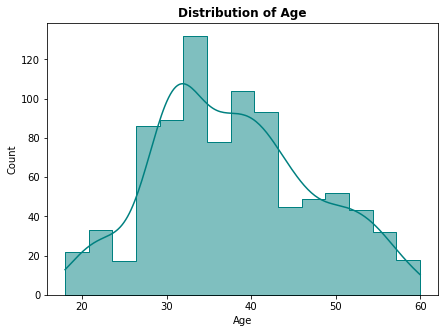

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], kde=True, color='teal', element='step', bins=15)
plt.title('Distribution of Age', fontweight="bold")
plt.show()

In [23]:
df['Age']

0       50.0
1       36.0
2       21.0
3       50.0
4       52.0
        ... 
1024     NaN
1025    41.0
1026    22.0
1027    29.0
1028    50.0
Name: Age, Length: 1029, dtype: float64

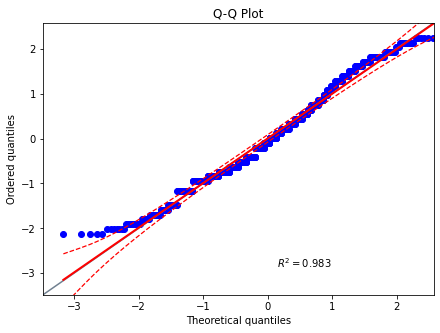

In [24]:
pg.qqplot(df['Age'], dist='norm', figsize=(7, 5))
plt.show()

In [25]:
# Agostino-Pearson Test

gstat, p = stats.normaltest(df['Age'], nan_policy='omit')
gstat, p

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p)
if p < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 2.294122238973734e-07
The null hypothesis can be rejected / Data tidak normal


__Note :__ Berdasarkan normality test dari feature Age, dapat diketahui bahwa feature Age memiliki persebaran data yang tidak normal. Oleh karena itu, untuk mengisi missing value dapat menggunakan __median__ dari feature Age

> # DistanceFromHome

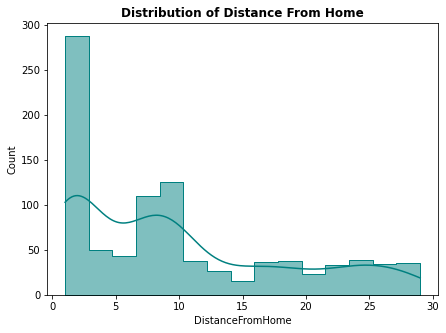

In [26]:
plt.figure(figsize=(7,5))
sns.histplot(df['DistanceFromHome'], kde=True, color='teal', element='step', bins=15)
plt.title('Distribution of Distance From Home', fontweight="bold")
plt.show()

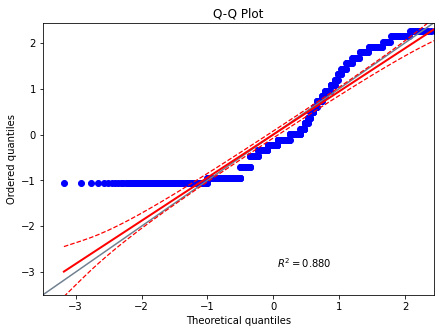

In [27]:
pg.qqplot(df['DistanceFromHome'], dist='norm', figsize=(7, 5))
plt.show()

In [28]:
gstat, p = stats.normaltest(df['DistanceFromHome'], nan_policy='omit')
gstat, p

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p)
if p < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 8.831179210728485e-23
The null hypothesis can be rejected / Data tidak normal


__Note :__ Berdasarkan normality test dari feature DistanceFromHome, dapat diketahui bahwa feature DistanceFromHome memiliki persebaran data yang tidak normal. Oleh karena itu, untuk mengisi missing value dapat menggunakan __median__ dari feature DistanceFromHome

> ## BusinessTravel

In [29]:
df['BusinessTravel'].value_counts(dropna=False)

Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
NaN                    5
Name: BusinessTravel, dtype: int64

In [30]:
df[df['BusinessTravel'].isna() == True]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
171,45.0,No,NaN,Research & Development,28.0,3,Technical Degree,4,Male,3,1,Research Scientist,4,Married,2132,4585,4,No,20,4,4,1,8,3,3,5,4,0,3
255,24.0,No,NaN,Research & Development,17.0,1,Medical,4,Female,2,2,Manufacturing Director,3,Divorced,4377,24117,1,No,15,3,2,2,5,6,3,4,2,3,2
260,29.0,No,NaN,Sales,NaN,3,Medical,1,Male,2,2,Sales Executive,2,Divorced,4187,3356,1,Yes,13,3,2,1,10,3,2,10,0,0,9
333,32.0,No,NaN,Sales,4.0,2,Life Sciences,3,Female,3,1,Sales Representative,2,Married,3931,20990,2,No,11,3,1,1,6,5,3,4,3,1,2
339,40.0,No,NaN,Research & Development,2.0,2,Life Sciences,3,Female,3,1,Laboratory Technician,1,Married,3377,25605,4,No,17,3,4,1,7,5,2,4,3,0,2


In [31]:
df[df['BusinessTravel'].isna() == True]['PerformanceRating'].value_counts()

3    4
4    1
Name: PerformanceRating, dtype: int64

In [32]:
df[df['PerformanceRating'] == 3]['BusinessTravel'].value_counts()

Travel_Rarely        611
Travel_Frequently    166
Non-Travel            84
Name: BusinessTravel, dtype: int64

In [33]:
df[df['PerformanceRating'] == 4]['BusinessTravel'].value_counts()

Travel_Rarely        112
Travel_Frequently     33
Non-Travel            18
Name: BusinessTravel, dtype: int64

__Note :__ Untuk mengisi missing value pada feature BusinessTravel, dapat diisi dengan frekuensi terbanyak (modus) dari feature BusinessTravel.

> ## MaritalStatus

In [34]:
df['MaritalStatus'].value_counts(dropna=False)

Married     474
Single      320
Divorced    230
NaN           5
Name: MaritalStatus, dtype: int64

In [35]:
df[df['MaritalStatus'].isna() == True]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
10,40.0,No,Travel_Rarely,Sales,4.0,4,Marketing,3,Male,2,3,Sales Executive,4,NaN,10855,8552,7,No,11,3,1,1,15,2,2,12,11,2,11
89,43.0,No,Travel_Rarely,Research & Development,7.0,3,Life Sciences,3,Female,3,3,Healthcare Representative,1,NaN,9985,9262,8,No,16,3,1,1,10,1,2,1,0,0,0
105,29.0,Yes,Travel_Rarely,Research & Development,1.0,2,Life Sciences,2,Female,2,1,Laboratory Technician,1,NaN,2319,6689,1,Yes,11,3,4,1,1,1,3,1,0,0,0
107,41.0,No,Non-Travel,Research & Development,7.0,1,Life Sciences,2,Female,1,5,Research Director,3,NaN,19973,20284,1,No,22,4,2,2,21,3,3,21,16,5,10
150,57.0,No,Travel_Rarely,Research & Development,1.0,2,Life Sciences,2,Male,4,2,Research Scientist,3,NaN,4900,2721,0,No,24,4,1,1,13,2,2,12,9,2,8


In [36]:
df[df['MaritalStatus'].isna() == True]['StockOptionLevel'].value_counts()

1    4
2    1
Name: StockOptionLevel, dtype: int64

In [37]:
df[df['StockOptionLevel'] == 1]['MaritalStatus'].value_counts()

Married     280
Divorced    133
Name: MaritalStatus, dtype: int64

In [38]:
df[df['StockOptionLevel'] == 2]['MaritalStatus'].value_counts()

Married     56
Divorced    54
Name: MaritalStatus, dtype: int64

__Note :__ Untuk mengisi missing value pada feature MaritaslStatus, dapat diisi dengan frekuensi terbanyak (modus) dari feature MaritaslStatus.

> # Inputting Missing Value

In [39]:
df_clean = df.copy()
df_clean.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,Research & Development,1.0,2,Medical,4,Male,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,Research & Development,6.0,2,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,Sales,7.0,1,Marketing,2,Male,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,Human Resources,NaN,3,Medical,1,Male,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,Research & Development,7.0,4,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


In [40]:
df_clean['Age'].fillna(value= int(df['Age'].median()), inplace=True)
df_clean['DistanceFromHome'].fillna(value= int(df['DistanceFromHome'].median()), inplace=True)

df_clean['BusinessTravel'].fillna(value= df['BusinessTravel'].mode()[0], inplace=True)
df_clean['MaritalStatus'].fillna(value= df['MaritalStatus'].mode()[0], inplace=True)

In [41]:
df_clean.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# EXPORT DATA

In [42]:
# df.to_csv('Data/Employee Attrition Ready.csv', header=True, index=False)

In [43]:
# df_clean.to_csv('Data/Employee Attrition Cleaned.csv', header=True, index=False)

__Note :__ Export data terbagi menjadi 2. Dimana kedua data tersebut akan dipakai dengan fungsi yang berbeda. 'Employee Attrition Cleaned.csv' untuk EDA, sedangkan 'Employee Attrition Ready.csv' untuk Modeling.